In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle
import pandas as pd

In [2]:
higgs_file = open ("higgs_100000_pt_250_500.pkl", 'rb')
qcd_file = open ("qcd_100000_pt_250_500.pkl", 'rb')

# QCD is background, Higgs is signal
qcd = pickle.load(qcd_file)
higgs = pickle.load(higgs_file)


print("pt = Transverse Momentum")
print("eta = Pseudo Rapidity")
print("phi = Azimuthal Angle")
print("mass = Mass")
print("ee2 = Energy Correlation Function 2")
print("ee3 = Energy Correlation Function 3")
print("d2 = Energy Correlation Function")
print("angularity = Jet broadness to thrust ratio")
print("t1 = subjettiness of degree 1")
print("t2 = subjettiness of degree 2") 
print("t3 = subjettiness of degree 3")
print("t21 = ratio of t2/t1")
print("t32 = ratio of t3/t2")
print("KtDeltaR = Delta R of two subjets within large-R jet")

pt = Transverse Momentum
eta = Pseudo Rapidity
phi = Azimuthal Angle
mass = Mass
ee2 = Energy Correlation Function 2
ee3 = Energy Correlation Function 3
d2 = Energy Correlation Function
angularity = Jet broadness to thrust ratio
t1 = subjettiness of degree 1
t2 = subjettiness of degree 2
t3 = subjettiness of degree 3
t21 = ratio of t2/t1
t32 = ratio of t3/t2
KtDeltaR = Delta R of two subjets within large-R jet


Above is a translation of the name of the data inside the dataset to what it represents. From this point on these may be used interchangeably in descriptions and labels. Anytime "QCD" is used (as in the name of the dataset), it refers to the simulation data. Anytime "Higgs" is used it refers to the pseudo-experiment data.

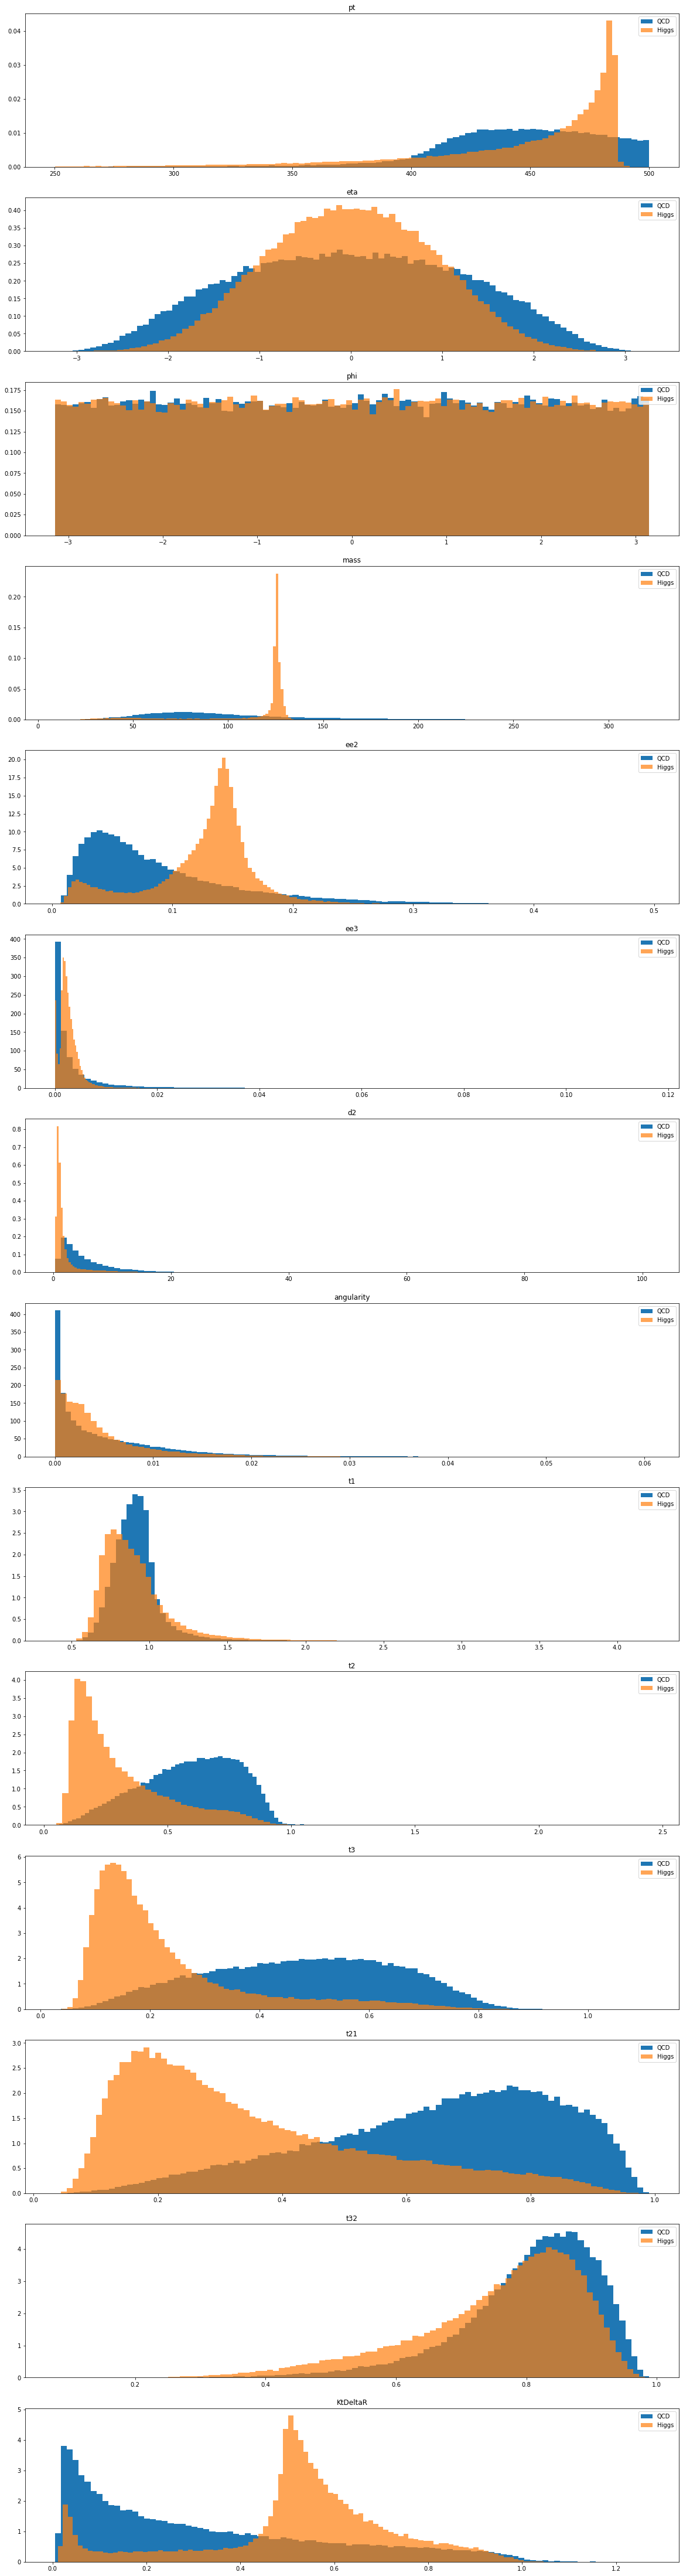

In [3]:
fig, ax = plt.subplots(14, 1, figsize = (20,80))

# First block of code graphs QCD simulation and Higgs pseudo-data on different graphs. To use this block make sure subplots is (14, 2).
# i = 0
# for key in qcd:
#     ax[i, 0].hist(qcd[key], density = True, bins = 100)
#     ax[i, 0].set_title(key)
#     i += 1

# i = 0
# for key in higgs:
#     ax[i, 1].hist(higgs[key], density = True, bins = 100)
#     ax[i, 1].set_title(key)
#     i = i + 1
    
# Second block of code graphs QCD simulation and Higgs pseudo-data on the same graph. To use this block make sure subplots is (14, 1).
i = 0
for key in qcd:
    ax[i].hist(qcd[key], density = True, bins = 100)
    ax[i].hist(higgs[key], density = True, bins = 100, alpha = .7)
    ax[i].set_title(key)
    ax[i].legend(["QCD", "Higgs"])
    i += 1

Above are graphs of the QCD and Higgs data. From these we can see (qualitatively) how the simulation and pseudo-experiment data line up for each of the measured values. Features where the two datasets line up well (such as phi) provide little discrimination power between the two datasets, features where the sets line up little provide larger discrimination power.

In [4]:
# fig, ax = plt.subplots(184, 2, figsize = (20,750))


# i = 0
# for key in qcd:
#     for key2 in qcd:
#         if key != key2:
#             ax[i, 0].hist2d(qcd[key], qcd[key2], density = True, bins = 200, cmap = 'jet')
#             ax[i, 0].set_xlabel(key)
#             ax[i, 0].set_ylabel(key2)
#             i += 1

# i = 0
# for key in higgs:
#     for key2 in higgs:
#         if key != key2:
#             ax[i, 1].hist2d(higgs[key], higgs[key2], density = True, bins = 200, cmap = 'jet')
#             ax[i, 1].set_xlabel(key)
#             ax[i, 1].set_ylabel(key2)
#             i = i + 1

# plt.show()

In [9]:
corr_coef_q = []
   
for key in qcd:
    for key2 in qcd:
        corr_coef_q.append([key, key2, stats.pearsonr(qcd[key], qcd[key2])])

vals_q = []
for key in qcd:
    for key2 in qcd:
        for i in range(len(corr_coef_q)):
            if corr_coef_q[i][0] == key and corr_coef_q[i][1] == key2:
                vals_q.append(corr_coef_q[i][2][0])

table_vals_q = []
for i in range(int(len(vals_q) / 14)):
    table_vals_q.append(vals_q[i*14:i*14 + 14])

df_qcd = pd.DataFrame(table_vals_q, index = pd.Index(qcd.keys()), columns = pd.Index(qcd.keys()))

corr_coef_h = []
   
for key in higgs:
    for key2 in higgs:
        corr_coef_h.append([key, key2, stats.pearsonr(higgs[key], higgs[key2])])

vals_h = []
for key in higgs:
    for key2 in higgs:
        for i in range(len(corr_coef_h)):
            if corr_coef_h[i][0] == key and corr_coef_h[i][1] == key2:
                vals_h.append(corr_coef_h[i][2][0])

table_vals_h = []
for i in range(int(len(vals_h) / 14)):
    table_vals_h.append(vals_h[i*14:i*14 + 14])

df_qcd = pd.DataFrame(table_vals_q, index = pd.Index(qcd.keys()), columns = pd.Index(qcd.keys()))
df_higgs = pd.DataFrame(table_vals_h, index = pd.Index(higgs.keys()), columns = pd.Index(higgs.keys()))
    
print("Correlation Coefficients for QCD-")
df_qcd.style
display(df_qcd)

print("\n Correlation Coefficients for Higgs-")
df_higgs.style
display(df_higgs)

Correlation Coefficients for QCD-


,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
pt,1.000000,0.001646,-0.002151,0.116106,-0.065045,-0.071166,0.044540,-0.006096,-0.015842,-0.015435,-0.012933,-0.010350,0.002034,-0.020723
eta,0.001646,1.000000,0.001982,0.000331,-0.000829,0.000016,0.003129,0.001901,0.001541,0.003722,0.001989,0.002678,-0.002362,0.002631
phi,-0.002151,0.001982,1.000000,0.001781,-0.000084,-0.001442,0.000616,0.002013,0.000068,0.003766,0.004418,0.003519,0.002664,-0.003412
mass,0.116106,0.000331,0.001781,1.000000,0.944705,0.823995,-0.609440,0.395267,0.047805,-0.518935,-0.597166,-0.571218,-0.369384,0.709354
ee2,-0.065045,-0.000829,-0.000084,0.944705,1.000000,0.888003,-0.660044,0.335057,0.161316,-0.519772,-0.613476,-0.621209,-0.412979,0.661513
ee3,-0.071166,0.000016,-0.001442,0.823995,0.888003,1.000000,-0.413854,0.346522,0.163273,-0.304939,-0.408181,-0.388633,-0.400095,0.533815
d2,0.044540,0.003129,0.000616,-0.609440,-0.660044,-0.413854,1.000000,-0.174517,-0.110423,0.505221,0.553272,0.600450,0.239771,-0.466225
angularity,-0.006096,0.001901,0.002013,0.395267,0.335057,0.346522,-0.174517,1.000000,0.013484,-0.069498,-0.099513,-0.090325,-0.109640,0.263082
t1,-0.015842,0.001541,0.000068,0.047805,0.161316,0.163273,-0.110423,0.013484,1.000000,0.285307,0.206263,-0.087536,-0.151472,-0.209706
t2,-0.015435,0.003722,0.003766,-0.518935,-0.519772,-0.304939,0.505221,-0.069498,0.285307,1.000000,0.934555,0.913813,0.057613,-0.675798



 Correlation Coefficients for Higgs-


,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
pt,1.000000,-0.002129,0.001585,0.175370,-0.254340,-0.463733,-0.052192,-0.087057,-0.035002,-0.077958,-0.088589,-0.067704,-0.007152,-0.128198
eta,-0.002129,1.000000,-0.000406,0.000956,0.002153,0.004534,-0.000151,0.004274,0.002319,0.001370,0.001221,0.000088,-0.000048,-0.000458
phi,0.001585,-0.000406,1.000000,-0.002895,-0.005504,-0.004968,0.003222,0.001009,-0.004121,-0.001214,0.001452,0.000322,0.003567,0.000358
mass,0.175370,0.000956,-0.002895,1.000000,0.813764,0.445566,-0.836983,0.037857,-0.019461,-0.698137,-0.811544,-0.710751,-0.135391,0.654055
ee2,-0.254340,0.002153,-0.005504,0.813764,1.000000,0.737763,-0.772951,-0.131983,0.230258,-0.537445,-0.665586,-0.639195,-0.213722,0.468551
ee3,-0.463733,0.004534,-0.004968,0.445566,0.737763,1.000000,-0.366714,0.062178,0.199961,0.006620,-0.153715,-0.068111,-0.393777,0.263007
d2,-0.052192,-0.000151,0.003222,-0.836983,-0.772951,-0.366714,1.000000,0.081458,-0.033893,0.692267,0.782655,0.728085,0.075884,-0.554474
angularity,-0.087057,0.004274,0.001009,0.037857,-0.131983,0.062178,0.081458,1.000000,-0.244415,0.058273,0.055166,0.152686,-0.000888,0.266979
t1,-0.035002,0.002319,-0.004121,-0.019461,0.230258,0.199961,-0.033893,-0.244415,1.000000,0.190188,0.106375,-0.094686,-0.223568,-0.301780
t2,-0.077958,0.001370,-0.001214,-0.698137,-0.537445,0.006620,0.692267,0.058273,0.190188,1.000000,0.927438,0.943797,-0.330452,-0.661620


Above is a table of the correlation coefficients, given by $ r = \frac{\sum (x_i - \overline x)(y_i - \overline y)}{\sqrt{\sum (x_i - \overline x) ^ 2 \sum (y_i - \overline y) ^ 2}} $, for each measured value. This shows how much the data types align with each other with a linear relationship. The values are from -1 to 1, with 0 being no correlation, 1 being completely correlated (i.e. the same), and a negative value showing negative correlation as opposed to positive correlation. This is similar to what a person would qualitatively read from a 2D density histogram of the two data types.

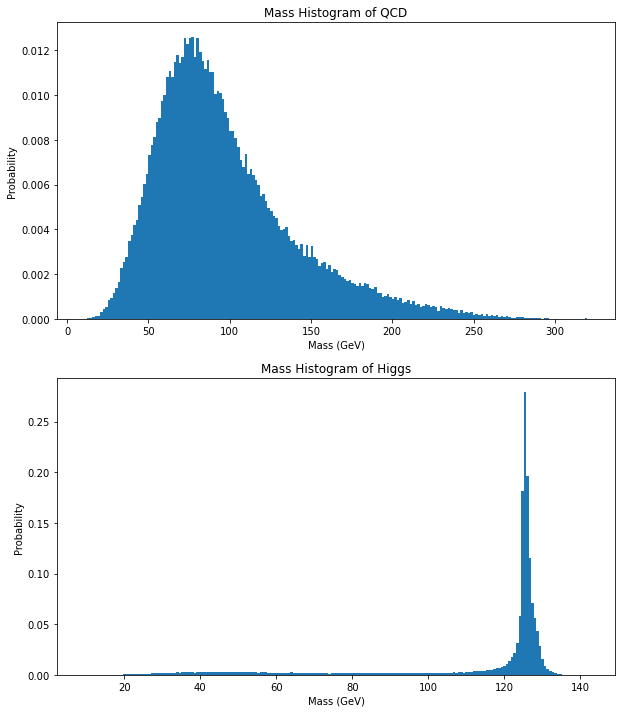

In [6]:
fig, ax = plt.subplots(2, 1, figsize = (10, 12))

ax[0].hist(qcd['mass'], bins = 200, density = True)
ax[1].hist(higgs['mass'], bins = 200, density = True)
ax[0].set_title('Mass Histogram of QCD')
ax[0].set_xlabel("Mass (GeV)")
ax[0].set_ylabel("Probability")
ax[1].set_title('Mass Histogram of Higgs')
ax[1].set_xlabel("Mass (GeV)")
ax[1].set_ylabel("Probability")
plt.show()

Using the above histograms (plotted on different axes to show features better), we can see that the most probable value of the Higgs Boson mass is about 125 GeV. From these we can calculate the significance of a 125 reading in the (normalized) QCD data by summing the probabilities of everything lower than 125 and calculating the sigma associated with this probability. We can also find what value would be needed for a 5 sigma significance by summing the probabilities of the normalized background until we get to a probability of (1 - prob(5 sigma)), then seeing what the lowest mass that was not included in this summation was.

In [13]:
# fig, ax = plt.subplots(1, 1)

# ax.hist(qcd['mass'], bins = 200, density = True)

# lin = np.arange(0, 300, 1)
# pois = stats.poisson.pmf(lin, 75, loc = 0)
# ax.plot(lin, pois)

prob5sigma = stats.norm.cdf(5, loc = 0, scale = 1)

sort_mass = []
for i in range(len(qcd['mass'])):
    sort_mass.append(qcd['mass'][i])
    
sort_mass.sort()
index = 0
for i in range(len(sort_mass)):
    if(sort_mass[i] >= 125):
        index = i
        break
        
norm_mass = sort_mass / np.sum(sort_mass)
prob = np.sum(norm_mass[index:])
        
index2 = 0
mass_sum = 0
for i in range(len(norm_mass)):
    mass_sum = mass_sum + norm_mass[i]
    if mass_sum >= prob5sigma:
        index2 = i
        break


orig_sig = stats.norm.ppf(prob, loc = 0, scale = 1)

print("Significance of a 125GeV reading is " + str(orig_sig.round(2)) + " sigma. Mass needed for a 5 sigma significance is " + str(sort_mass[index2].round(2)) + ".")

Significance of a 125GeV reading is -0.35 sigma. Mass needed for a 5 sigma significance is 321.4.


With this significance, we would need 15 readings of 125GeV in order to get a 5 sigma significance (obtained from multiplying the probability of each one independently occuring until the probability was less than 5 sigma).

To optimize the sensitivity we can combine readings from various sources, such as the subjettiness or KtDeltaR, as well as look at what features have correlations and seeing how these correlations change or are shaped in the pseudo-experiment data (using the features with the highest correlation ratios as depicted above). We could then take cuts of the 2D features to better optimize the sensitivity in these cuts as we would be throwing out less sensitive data.